In [207]:
import pickle as pkl
import numpy as np
import pandas as pd
import requests as rq
import json
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [395]:
Allgraphs = "../Data/reddit_suicideWatch/SW_morethan10_graphs_complete_revised/SW_morethan10_deeper_replygraphs_v3.pkl"
# Allgraphs = "../Data/reddit_pol/reddit_pol_FP_graph/Pol_FP_replygraphs.pkl"

In [396]:
allGraphs = pkl.load(open(Allgraphs,'rb'))

In [397]:
textDict = {}
for k in allGraphs:
    postText = nx.get_node_attributes(allGraphs[k],'text')
    textDict.update(postText)

In [398]:
len(textDict)

216992

In [439]:
# import csv
# fieldnames = ['postid', 'text']
# with open('../Data/reddit_suicideWatch/SW_text_v3.csv', 'wb') as output_file:
#     dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
#     dict_writer.writeheader()
#     for k in textDict:
#         dict_writer.writerow({'postid': k , 'text': textDict[k]})


In [440]:
LIWC = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SWTextDeeper.csv")
# LIWC = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_pol/LIWC2015_RedditPolDeeper.csv")

In [441]:
LIWC.keys()

Index([u'A', u'B', u'WC', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
     

In [442]:
LIWC.drop(LIWC.index[0])

LIWC.head()

,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,postid,text,1,92.84,50.00,1.00,25.77,1.0,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00
1,t1_c3o6v03,like a pet or an office fixture.,7,99.00,7.67,13.15,25.77,7.0,14.29,85.71,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00
2,t1_costhd8,It really sounds like you need meds then. Ask ...,46,15.38,99.00,16.76,99.00,9.2,4.35,91.30,...,4.35,0.00,0.0,0.00,0.0,0.00,0.0,4.35,0.00,0.00
3,t1_cgrrngb,I have found cbt very useful. First of all in ...,370,19.18,15.86,93.87,66.68,37.0,18.11,93.24,...,4.59,1.08,0.0,0.00,0.0,0.81,0.0,5.68,0.54,1.62
4,t1_csg5e3g,"True, and things just become harder to deal wi...",29,2.40,4.25,95.26,85.87,14.5,0.00,86.21,...,6.90,0.00,0.0,3.45,0.0,0.00,0.0,3.45,0.00,0.00


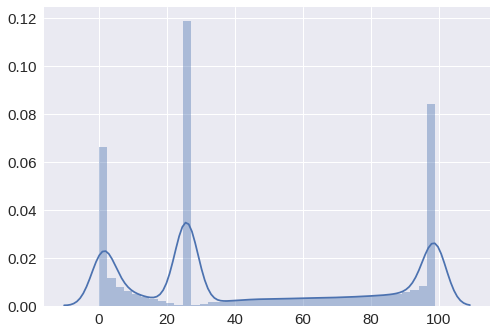

In [443]:
affectDict = {}
for index , row in LIWC.iterrows():
    affectDict[row['A']] =row['Tone']
    
len(affectDict)
sns.distplot(affectDict.values())

In [444]:
for g in allGraphs:
    
    updateDict = {}
    for n in allGraphs[g].nodes():
        if n not in affectDict:
            continue
        updateDict[n] = affectDict[n]
    nx.set_node_attributes(allGraphs[g] , 'affects' , updateDict)

In [445]:
len(allGraphs)

10157

In [446]:
testGraph = allGraphs[allGraphs.keys()[10]]
nodes =nx.get_node_attributes(testGraph,'author')
edges = testGraph.edges()

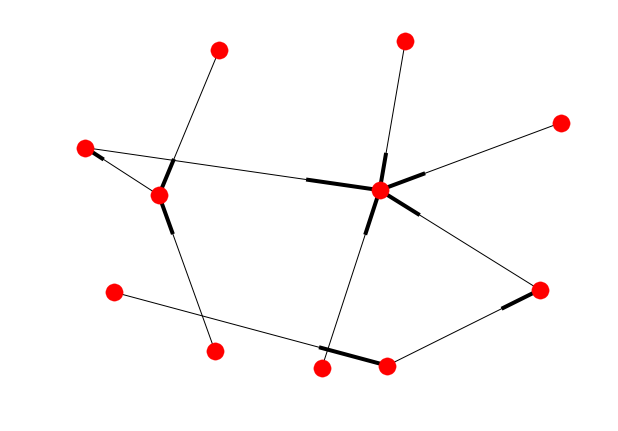

In [447]:
nx.draw(testGraph)

In [448]:
def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    print affects
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

{u't1_cll0v0w': 1.0, u't1_cll1fbh': 25.77, u't1_cll199z': 99.0, u't1_cllw511': 99.0, u't1_cll0ztm': 66.07, u't3_2kg69i': 85.87, u't1_cll0n1t': 25.77, u't1_cll0tis': 89.84, u't1_cll15pe': 1.0, u't1_cll1ca0': 25.77, u't1_cll0ojc': 25.77, u't1_cll0r0e': 25.77, u't1_cll13lr': 25.77, u't1_cll0sto': 25.77, u't1_cll0xnq': 8.79}
[122, 1010, 10564, 1010, 10564, 5192, 8270, 1010, 9010, 1010, 1010, 1010, 190, 122, 1010]
3


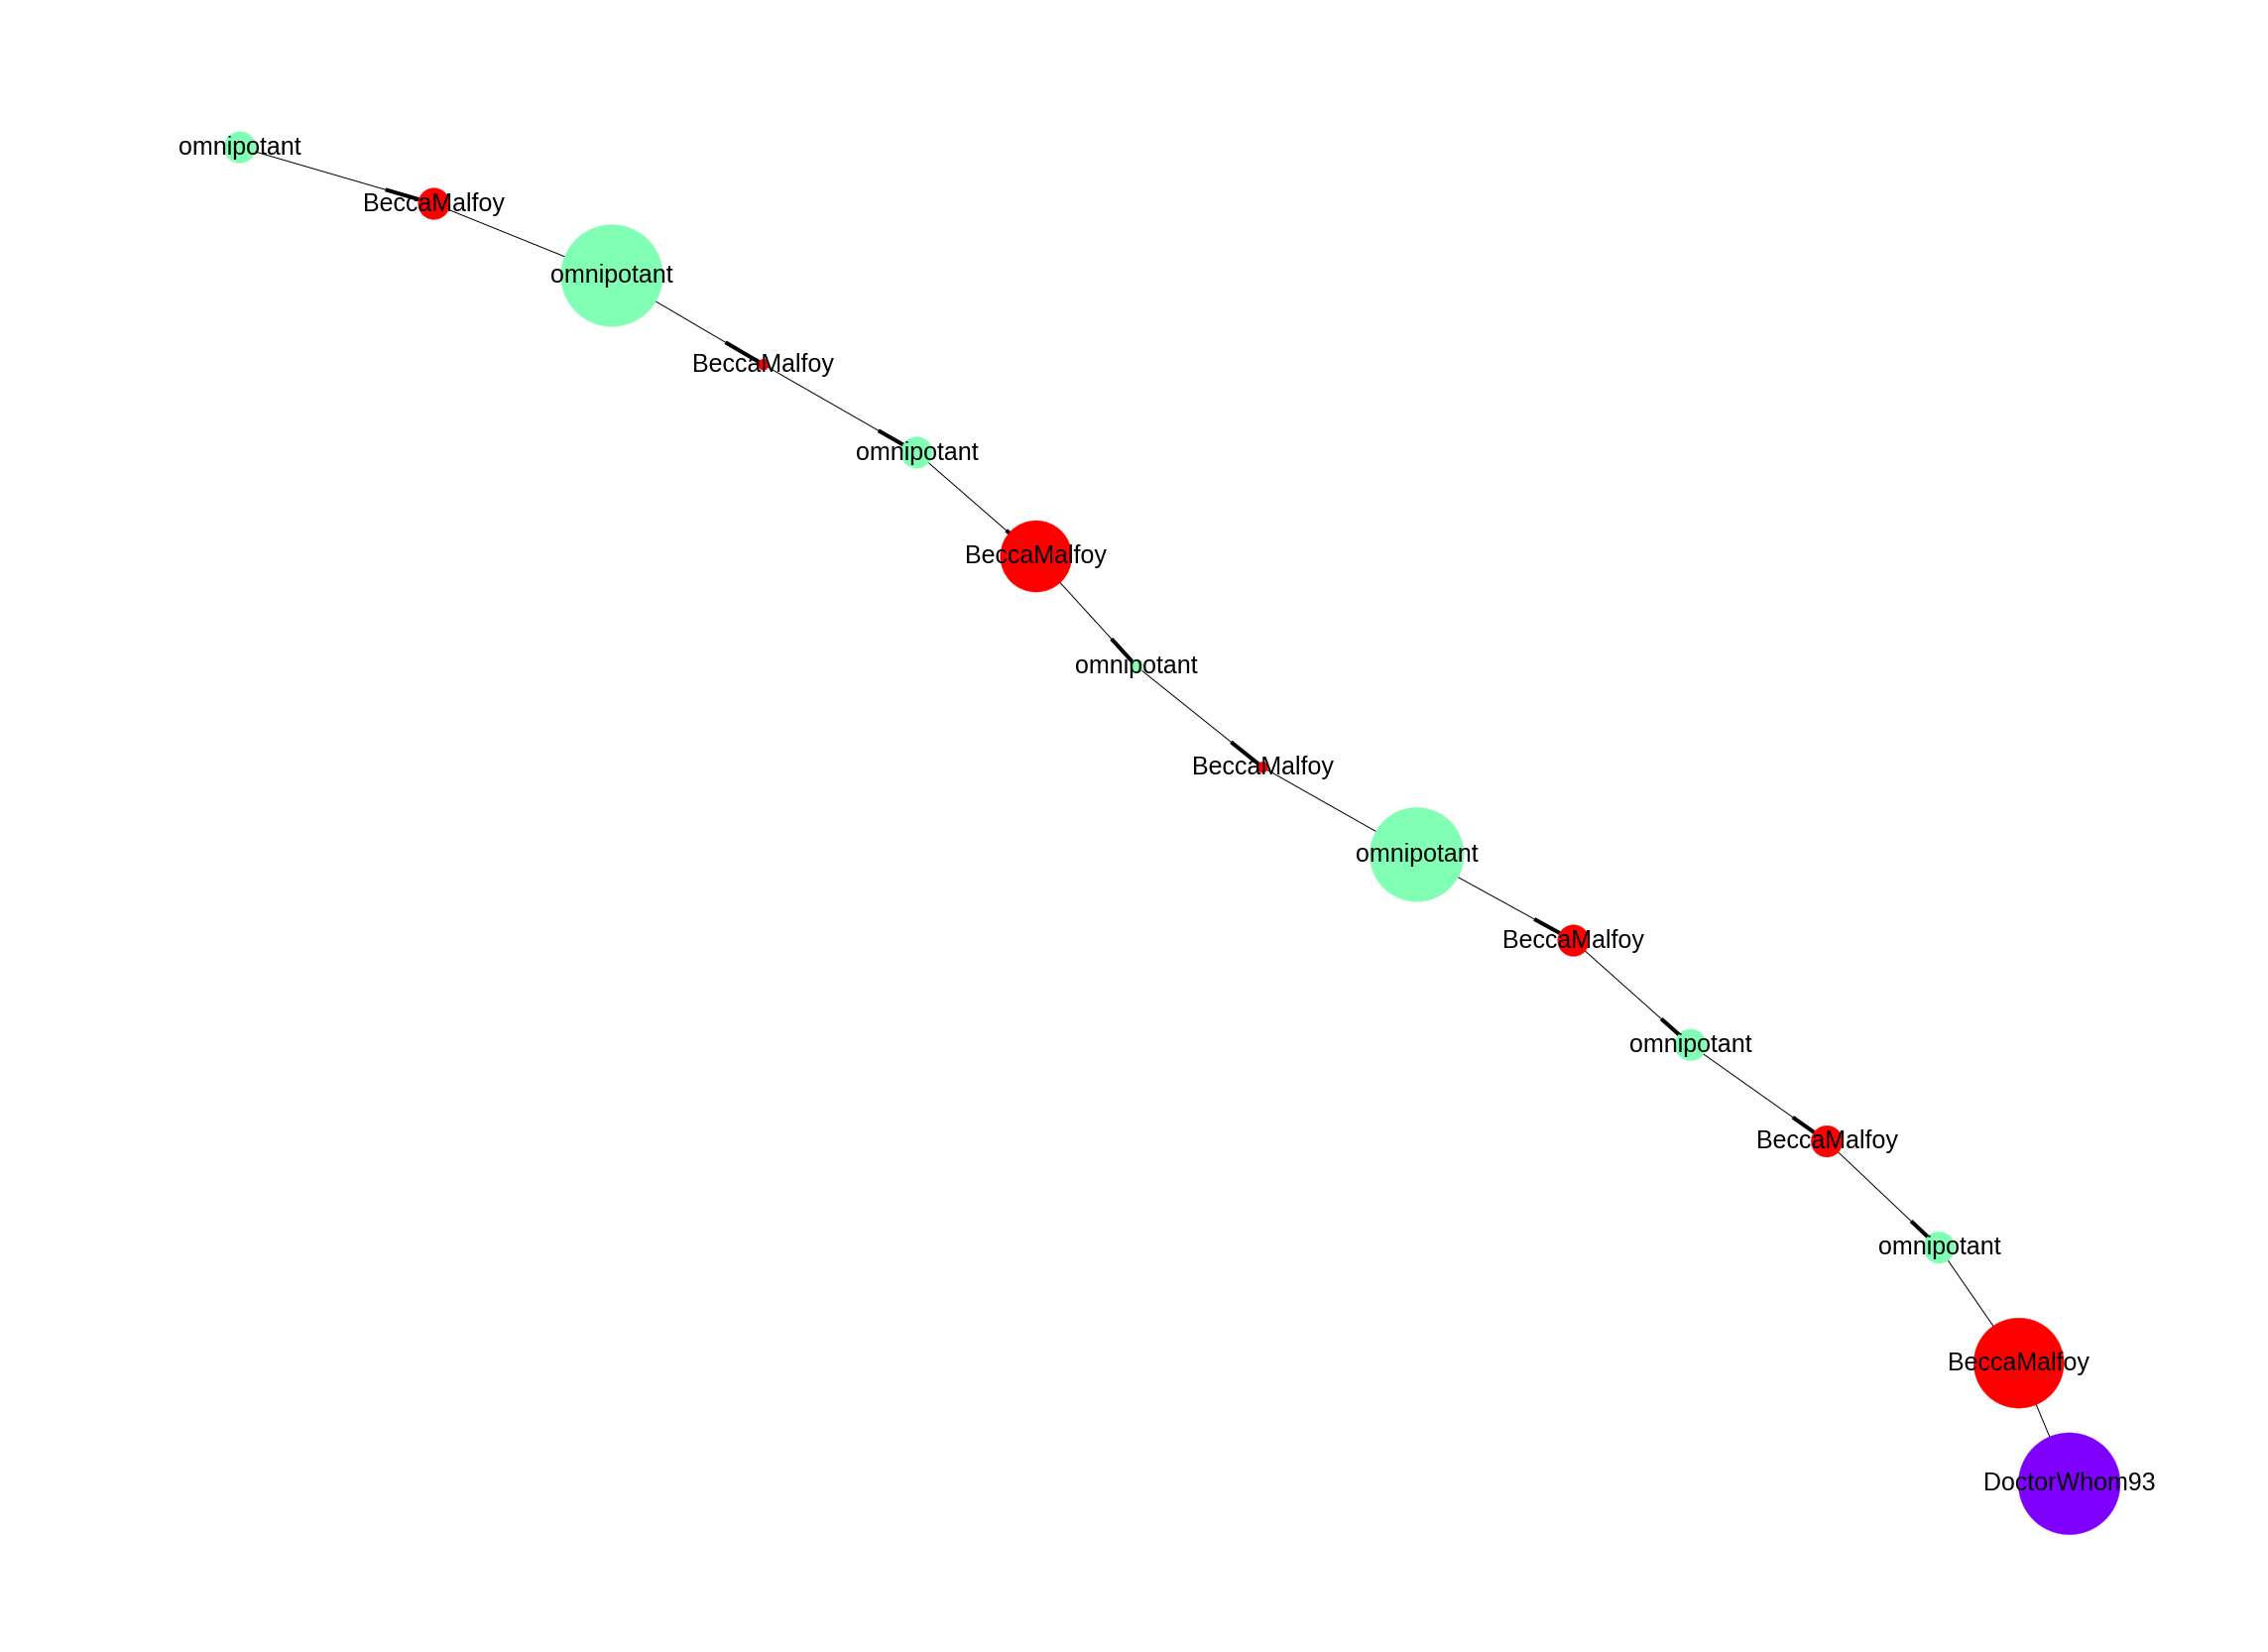

In [449]:
cascadeGraph = allGraphs[allGraphs.keys()[190]]
sizes = getScaledSizes(cascadeGraph)
print sizes
pos = graphviz_layout(cascadeGraph, prog='neato')

usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
print len(usr)
color=cm.rainbow(np.linspace(0,1,len(usr)))
colorMap = []
lls = {}
for node in cascadeGraph:
    c = usr.index(cascadeGraph.node[node]['author'])
    colorMap.append(color[c])
    lls[node] = cascadeGraph.node[node]['author']
fig, ax = plt.subplots()
fig.set_size_inches(40, 30)
#
nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
plt.show()

In [450]:
nx.get_node_attributes(allGraphs[allGraphs.keys()[150]], 'author').values().count('[deleted]')

0

In [451]:
userGraphs = {}
for i in allGraphs:
    deletedusers = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
    if deletedusers > 3:
        continue
    userGraph = nx.DiGraph()
    nodes = nx.get_node_attributes(allGraphs[i],'author')
    for e in allGraphs[i].edges():
        if e[0] not in nodes and e[1] not in nodes:
            continue
        elif e[0] not in nodes:
            src = "deleted"
            dst = nodes[e[1]]
        elif e[1] not in nodes:
            src = nodes[e[0]]
            dst = "deleted"
        else:
            src = nodes[e[0]]
            dst = nodes[e[1]]
        if not userGraph.has_node(src):
            userGraph.add_node(src)
        if not userGraph.has_node(dst):
            userGraph.add_node(dst)  
        if not userGraph.has_edge(src,dst):
            userGraph.add_edge(src, dst , weight=1 )
        else:
            userGraph[src][dst]['weight'] += 1
    userGraphs[i] = userGraph

In [452]:
len(userGraphs)

6397

8


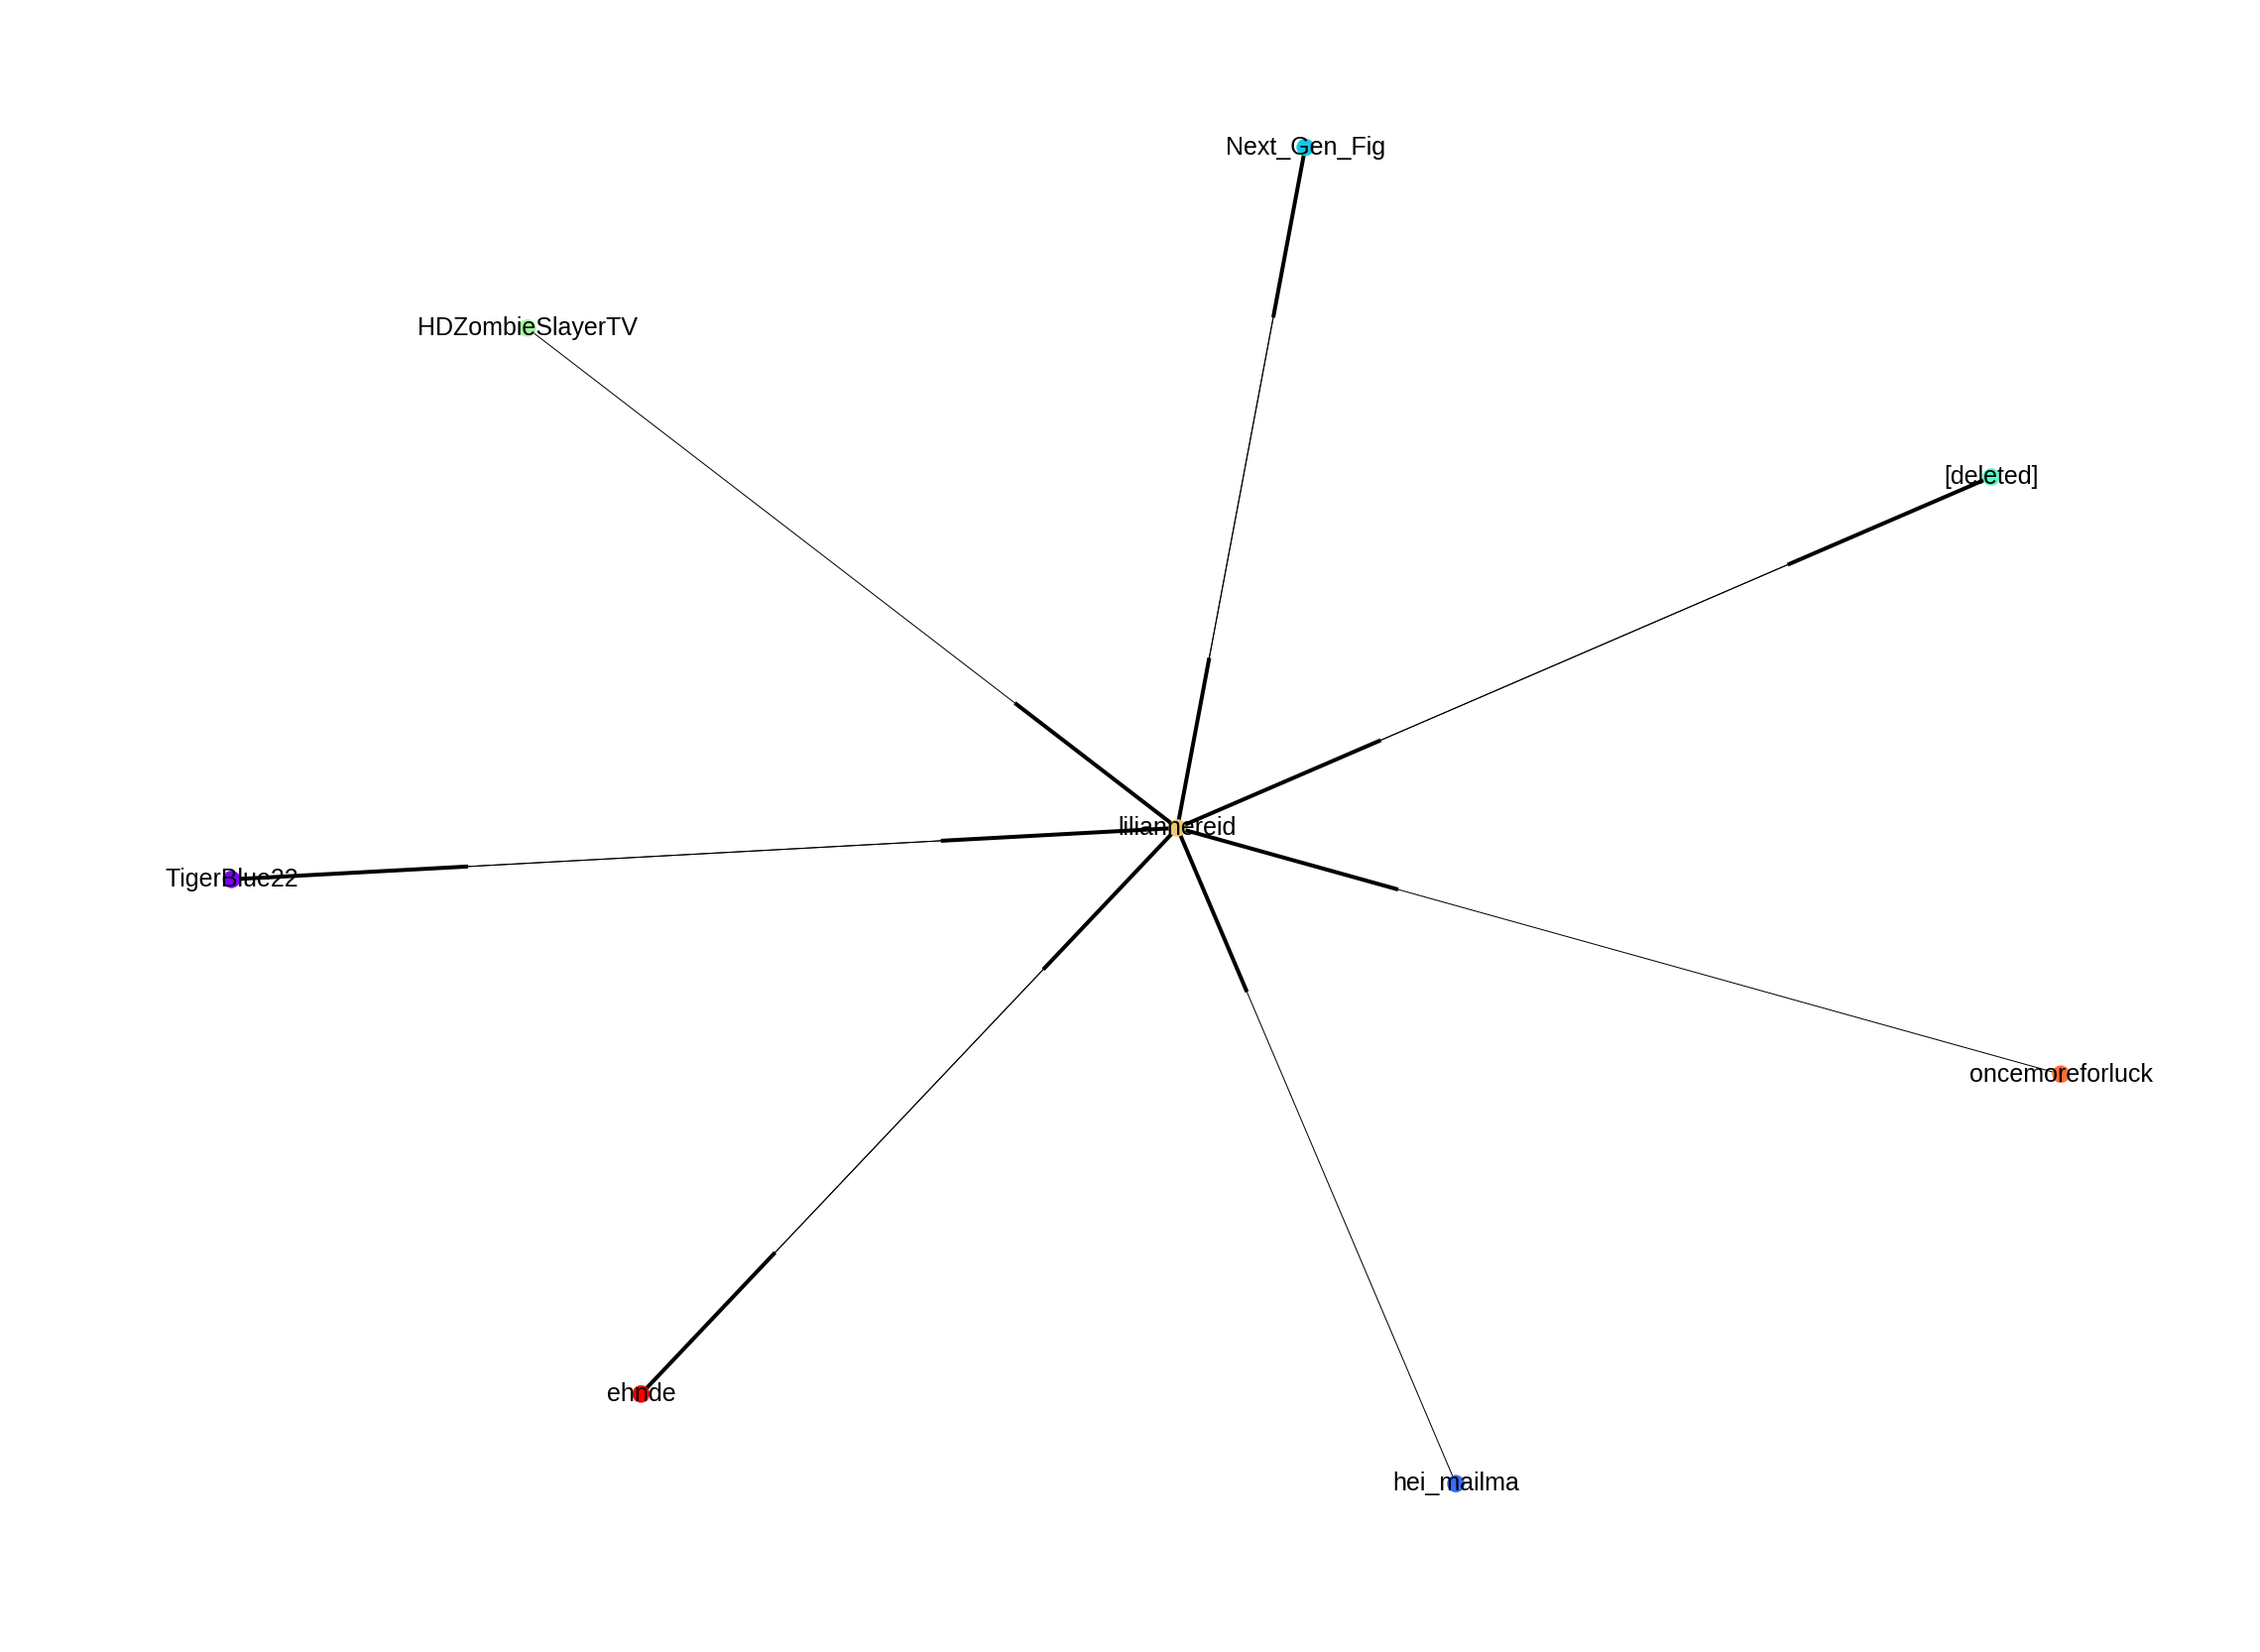

In [453]:
key = userGraphs.keys()[108]
ugraph = userGraphs[key]
# sizes = getScaledSizes(cascadeGraph)
pos = graphviz_layout(ugraph, prog='neato')

usr = ugraph.nodes()
print len(usr)
color=cm.rainbow(np.linspace(0,1,len(usr)))
colorMap = []
lls = {}
for node in ugraph:
    c = usr.index(node)
    colorMap.append(color[c])
    lls[node] = node
fig, ax = plt.subplots()
fig.set_size_inches(40, 30)
#
nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
plt.show()

In [454]:
def getRootauthors(replyGraphs):
    rootAuthors = {}
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'depth' in g.node[node]:
                if g.node[node]['depth'] == -1:
                    rootAuthors[k] =  g.node[node]['author']
    return rootAuthors

In [455]:
opAuthors = getRootauthors(allGraphs)

In [456]:
opAuthors

{'vj5co': u'[deleted]',
 '1uv2vj': u'[deleted]',
 'fjatc': u'drunk_otter',
 '1x6boy': u'Altruizzy',
 '97akw': u'Faustyna',
 '3ci391': u'[deleted]',
 's79sc': u'logospogos284',
 '2tjz9s': u'yolomgwtf',
 'b0mvj': u'lurkergirl',
 '2u23m8': u'stakaka',
 'e9cx6': u'Psy-Kosh',
 'mae5s': u'SSG_Schwartz',
 'ci9lz': u'Agnostix',
 '24gto5': u'Soletrador',
 'dwd3s': u'PawFox',
 '29en0c': u'LostInAPicture',
 '37zjrf': u'the_wheaty',
 '1cz1sd': u'RemFrank',
 '2nnud5': u'jackbrown103',
 '2wo3jj': u'neminemexcusat',
 '1h1vqu': u'[deleted]',
 '16hiex': u'chooby3000',
 'e1hjc': u'drqxx',
 'osxp1': u'no1one',
 '2kpspy': u'[deleted]',
 '2lhvye': u'AmalgamatedMan',
 '2at60d': u'[deleted]',
 '1p4pqm': u'[deleted]',
 'ylt41': u'TigerTigerBurning',
 '2hip0u': u'Chaos_apple',
 'xwu8q': u'blondin',
 '1dqizr': u'ta001001',
 '1jg4bt': u'blipsycat',
 'e6utj': u'dswis',
 'i36t9': u'yamsx1',
 'kou1f': u'Thesel',
 'alo36': u'[deleted]',
 'e7f4u': u'[deleted]',
 'm3pdi': u'Danaxeil',
 '145npe': u'raincloud12345',
 'w

In [457]:
filteredUserGraphs = {}
for g in userGraphs:
    if opAuthors[g] != '[deleted]':
        filteredUserGraphs[g] = userGraphs[g]

In [458]:
# print filteredUserGraphs[filteredUserGraphs.keys()[1]].get_edge_attributes('weight')

In [459]:
messageParti = []
userParti = []
BPusers = {}
rootmessages = []
for k in filteredUserGraphs:
    g = filteredUserGraphs[k]
    BPuser = 0
    BPmsges = 0

    BPusers[k] = []
    for e in g.edges():
        toMsgs = 0
        fromEdges = 0
        if e[1] == opAuthors[k]:
            if g.has_edge(e[1],e[0]):
                BPuser +=1 
                BPusers[k].append(e[0])
                toMsgs = g.get_edge_data(e[0],e[1])['weight']
                fromEdges = g.get_edge_data(e[1],e[0])['weight']
                BPmsges= BPmsges + min(2*toMsgs,fromEdges)
    if len(g.nodes()) == 0:
        print g.edges()
        continue
    userParti.append(float(BPuser)/float(len(g.nodes())))
    edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
    messageParti.append(float(BPmsges)/float(edgeWeights))
    

[]
[]


In [460]:
max(userParti)

1.0

In [461]:
# BPusers['26i7k4']

In [462]:
# nx.draw_networkx(filteredUserGraphs['35flze'])

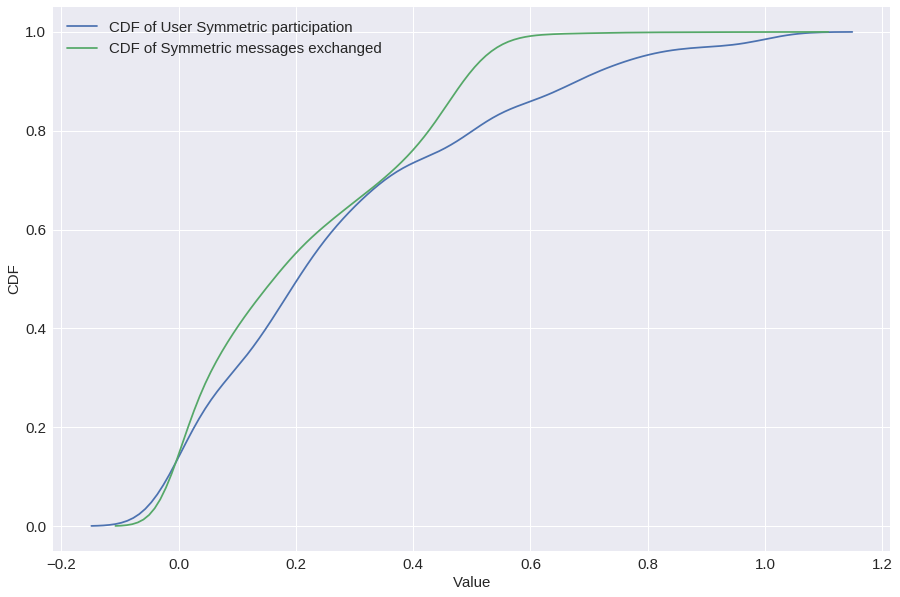

In [463]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(userParti,hist = False,kde_kws=dict(cumulative=True),label='CDF of User Symmetric participation')
sns.distplot(messageParti,hist = False,kde_kws=dict(cumulative=True), label='CDF of Symmetric messages exchanged')
sns.set(font_scale=1.5) 
plt.xlabel("Value", fontsize = 15)
plt.ylabel("CDF", fontsize = 15)

In [464]:
filteredUserGraphs[filteredUserGraphs.keys()[15]].to_undirected().neighbors(opAuthors[filteredUserGraphs.keys()[15]])

[u'Missing_love']

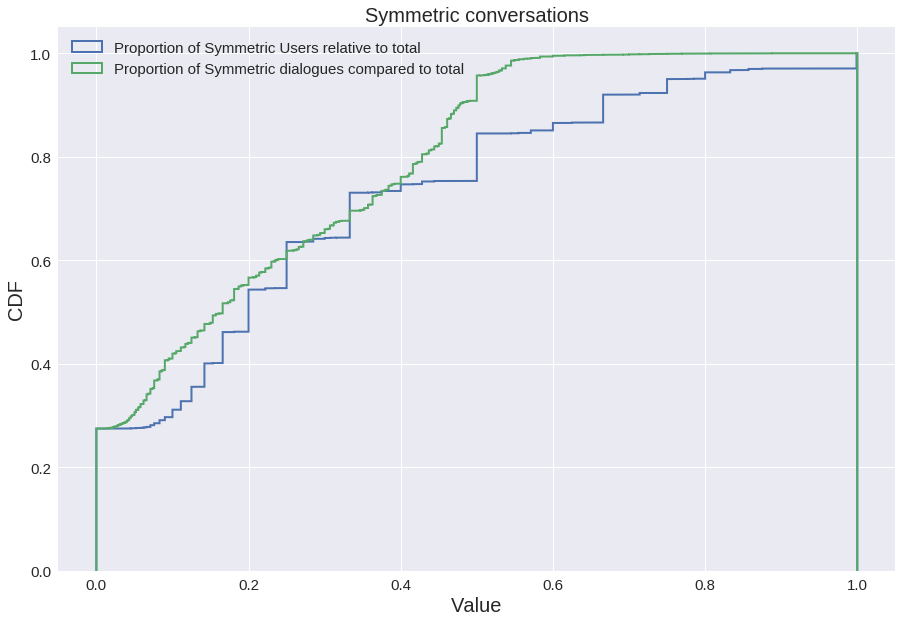

In [465]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Symmetric conversations", fontsize = 20)
plt.xlabel("Value",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Proportion of Symmetric Users relative to total','Proportion of Symmetric dialogues compared to total'], loc='upper left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [466]:
rootEmoDict = {}
BPUserEmoDict = {}
for k in BPusers:
    if k in opAuthors:
        for i , d in allGraphs[k].nodes(data=True):
            if 'author' in d:
                if d['author'] == opAuthors[k]:
                    depth = d['depth']
                    if depth not in rootEmoDict:
                        rootEmoDict[depth] = []
                    rootEmoDict[depth].append(d['affects'])
                elif d['author'] in BPusers[k]:
                    depth = d['depth']
                    if depth not in BPUserEmoDict:
                        BPUserEmoDict[depth] = []
                    BPUserEmoDict[depth].append(d['affects'])

In [467]:
rootContriButions= [len(rootEmoDict[k]) for k in rootEmoDict]
BPUserContriButions= [len(BPUserEmoDict[k]) for k in BPUserEmoDict]

In [468]:
rootMeanAffects =[]
BPMeanAffects =[]
rootError = []
BPError = []
for k in range(-1,205):
    if k in rootEmoDict:
        rootMeanAffects.append(np.mean(rootEmoDict[k]))
        rootError.append(np.std(rootEmoDict[k])/float(len(rootEmoDict[k])))
    else:
        rootMeanAffects.append(rootMeanAffects[-1])
        rootError.append(rootError[-1])
    if k in BPUserEmoDict:
        BPMedianAffects.append(np.mean(BPUserEmoDict[k]))
        BPError.append(np.std(BPUserEmoDict[k])/float(len(BPUserEmoDict[k])))
    else:
        BPMedianAffects.append(BPMedianAffects[-1])
        BPError.append(BPError[-1])

In [469]:
# sns.distplot(rootEmoDict[7])

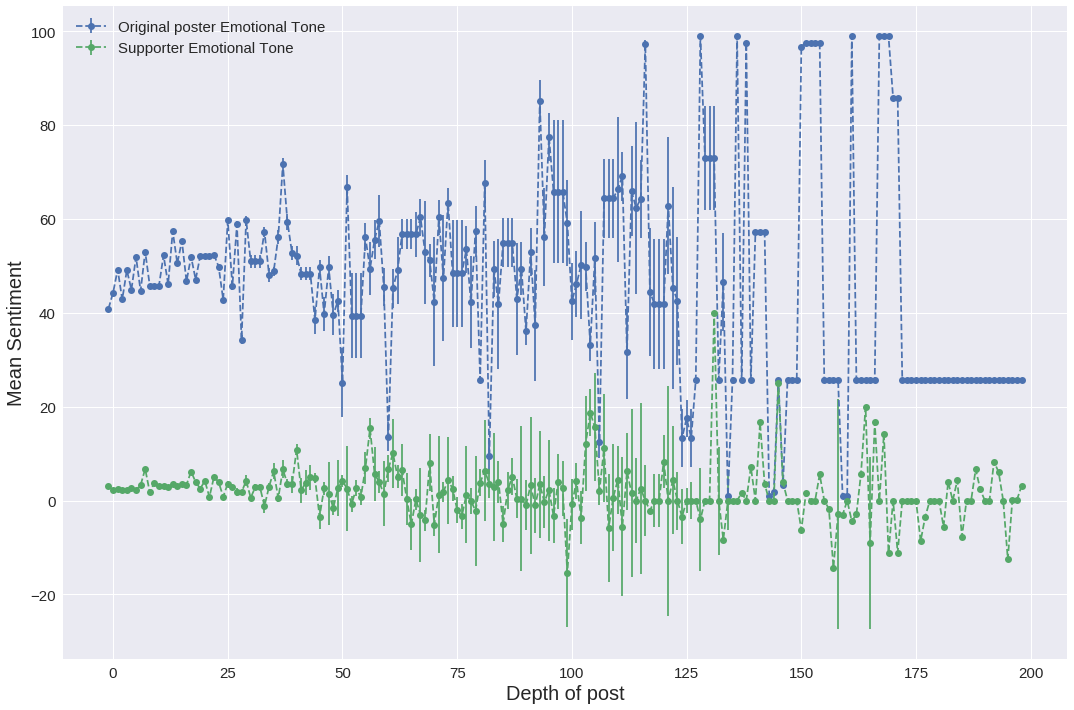

In [470]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(-1, 199, 1),rootMeanAffects[:200] , yerr=rootError[:200], fmt='--o')
ax.errorbar(np.arange(-1, 199, 1),BPMedianAffects[:200] , yerr=BPError[:200], fmt='--o')
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Sentiment" , fontsize = 20)
plt.legend(['Original poster Emotional Tone','Supporter Emotional Tone'])

sns.jointplot(x = np.asarray(np.arange(-1, 199, 1)) , y = np.asarray(rootMeanAffects[:200] ) , kind='reg' ,size = 10);
plt.xlabel("Depth at which the post is done", fontsize = 15)
plt.ylabel("Mean tone of the OP", fontsize = 15)

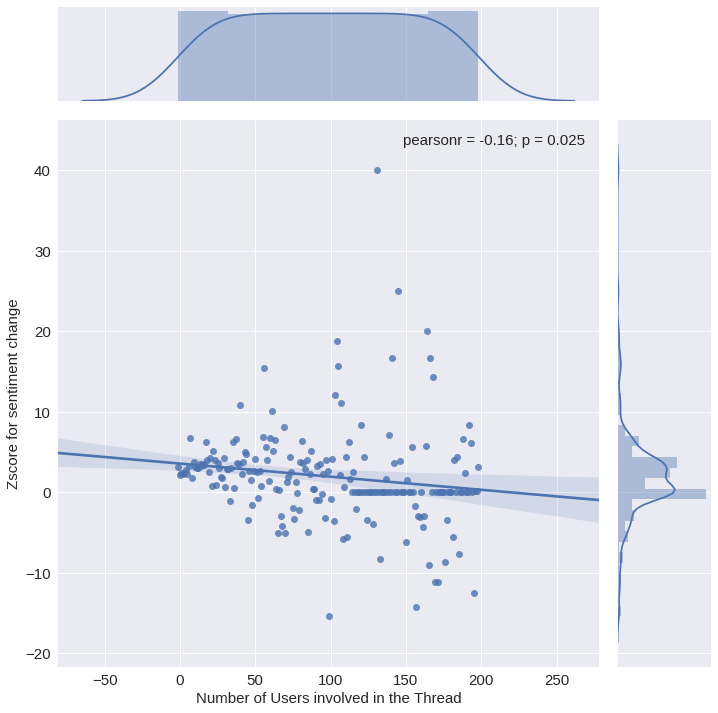

In [438]:
sns.jointplot(x = np.asarray(np.arange(-1, 199, 1)) , y = np.asarray(BPMedianAffects[:200] ) , kind='reg' ,size = 10);
plt.xlabel("Number of Users involved in the Thread", fontsize = 15)
plt.ylabel("Zscore for sentiment change", fontsize = 15)

In [393]:
userDist = [len(list(set(nx.get_node_attributes(allGraphs[g], 'author').values()))) for g in allGraphs]
depthDist = [max(list(set(nx.get_node_attributes(allGraphs[g], 'depth').values()))) for g in allGraphs]
upsDist = [max(list(set(nx.get_node_attributes(allGraphs[g], 'ups').values()))) for g in allGraphs]
triangleDist = [sum(list(nx.triangles(userGraphs[k].to_undirected()).values()))/3 for k in userGraphs]

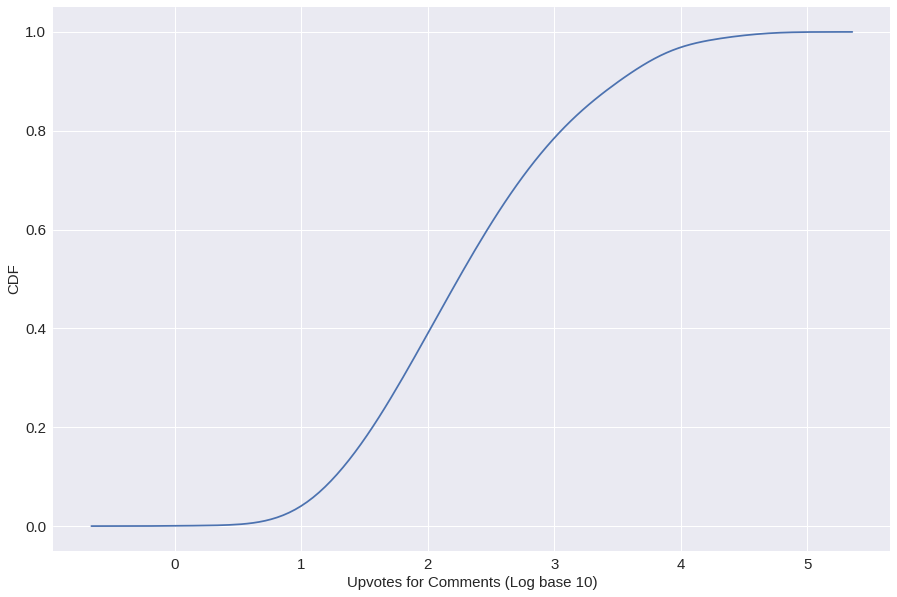

In [390]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(np.log10(upsDist),hist = False,kde_kws=dict(cumulative=True))
sns.set(font_scale=1.5) 
plt.xlabel("Upvotes for Comments (Log base 10)", fontsize = 15)
plt.ylabel("CDF", fontsize = 15)

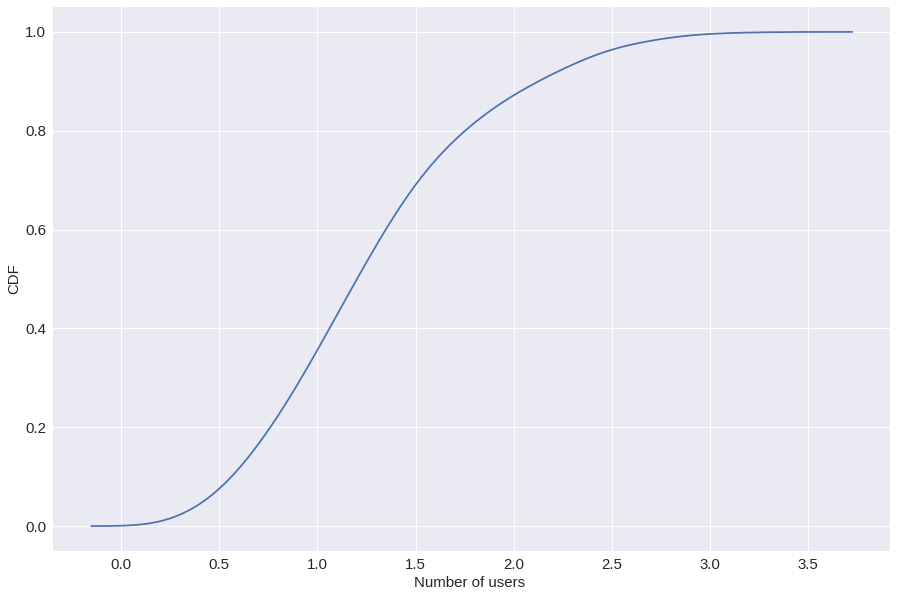

In [391]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(np.log10(userDist),hist = False,kde_kws=dict(cumulative=True))
sns.set(font_scale=1.5) 
plt.xlabel("Number of users ", fontsize = 15)
plt.ylabel("CDF", fontsize = 15)

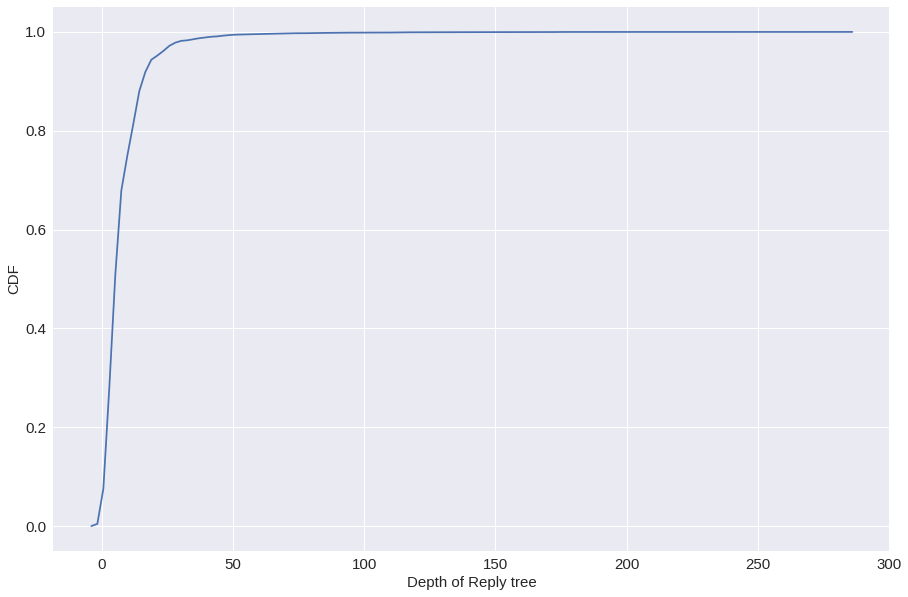

In [477]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(depthDist , hist=False , kde_kws=dict(cumulative=True))
# sns.distplot(triangleDist , hist=False , kde_kws=dict(cumulative=False))
sns.set(font_scale=1.5) 
plt.xlabel("Depth of Reply tree", fontsize = 15)
plt.ylabel("CDF", fontsize = 15)

In [478]:
max(depthDist)

283